In [12]:
import pandas as pd
import numpy as np
import os

In [24]:
pwd=os.getcwd()
df=pd.read_csv(pwd+"/test_task-steam_games.csv")
df['release_date'] = pd.to_datetime(df['release_date'], format='%d-%b-%y', errors='coerce')

1. For games released between 2012 and 2015, provide a count of those in the Indie, Action, and Adventure genres. If a game falls under multiple genres, count it in each applicable category.

In [28]:
df_filtered = df[(df['release_date'].dt.year >= 2012) & (df['release_date'].dt.year <= 2015)].copy()
target_genres = ['Indie', 'Action', 'Adventure']
df_filtered.loc[:, 'genre_list'] = df_filtered['genre'].str.split(',')
genre_exploded=df_filtered.explode('genre_list')
genre_counts= genre_exploded['genre_list'].value_counts()
target_genre_counts = {genre: int(genre_counts.get(genre, 0)) for genre in target_genres}
for genre, count in target_genre_counts.items():
    print(f"{genre:<12}{count:,.0f}")

Indie       3,461
Action      2,755
Adventure   1,901


2. List the top 5 popular tags of all time.

In [26]:
df.loc[:, 'tags_list'] = df['popular_tags'].str.split(',')
tags_exploded=df.explode('tags_list')
tags_count= tags_exploded['tags_list'].value_counts()
tag= pd.Series(tags_count)
top_tag = tag.head(5)
top_tag

tags_list
Indie         23718
Action        16112
Adventure     13378
Casual        12969
Simulation     9273
Name: count, dtype: int64

3. Generate a bar chart that visualizes the number of game releases for each year from 2015 to 2025.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

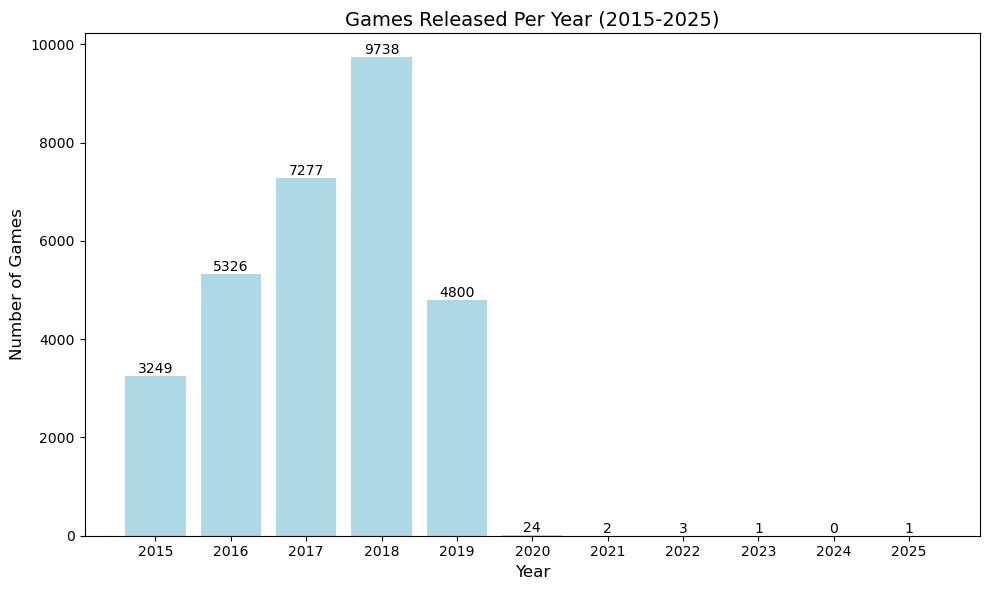

In [21]:
df['release_year'] = df['release_date'].dt.year
df_filtered = df[(df['release_year'] >= 2015) & (df['release_year'] <= 2025)]
games_per_year = df_filtered['release_year'].value_counts().sort_index()
yearly_counts= df_filtered.groupby('release_year').size()
yearly_counts = yearly_counts.reindex(range(2015, 2026)).fillna(0)

# Plot of the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_counts.index, yearly_counts.values, color='lightblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)    

plt.title('Games Released Per Year (2015-2025)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(range(2015,2026))
plt.tight_layout()
plt.show()
